# Regresión Lineal

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [2]:
x = np.array([5, 15, 25, 35, 45, 55])
y = np.array([5, 20, 14, 32, 22, 38])

In [3]:
x = np.array([5, 15, 25, 35, 45, 55]).reshape(-1, 1)
print(x)
print(x.shape)

[[ 5]
 [15]
 [25]
 [35]
 [45]
 [55]]
(6, 1)


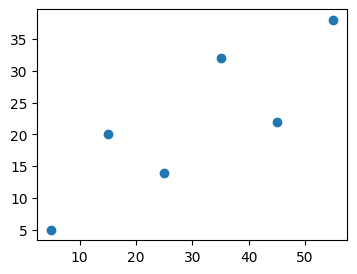

In [4]:
plt.figure(figsize=(4, 3))
plt.scatter(x, y)
plt.show()

Modelo Lineal

El algoritmo de regresión de `sklearn` solicita que los valores ingresados esten en formato de vector columna, lo que se puede lograr realizando `.reshape(-1,1)`.

In [5]:
model = LinearRegression()
model.fit(x, y)

LinearRegression()

In [6]:
model.predict([[3.4]])

array([7.46933333])

In [7]:
model.predict(x)

array([ 8.33333333, 13.73333333, 19.13333333, 24.53333333, 29.93333333,
       35.33333333])

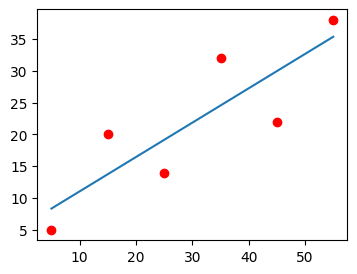

In [8]:
plt.figure(figsize=(4, 3))
plt.scatter(x, y, color="red")
plt.plot(x, model.predict(x))
plt.show()

$y = m·x + b$

In [9]:
m = model.coef_[0]
m

0.54

In [10]:
b = model.intercept_
b

5.633333333333329

In [11]:
print(f"Ecuación de la recta: y = {m}x + {b:,.2f}")

Ecuación de la recta: y = 0.54x + 5.63


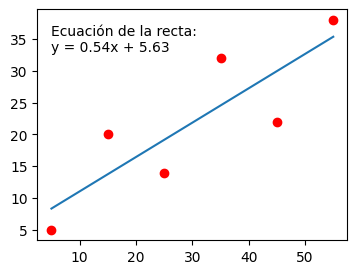

In [12]:
plt.figure(figsize=(4, 3))
plt.scatter(x, y, color="red")
plt.plot(x, model.predict(x))
plt.text(5, 33, f"Ecuación de la recta:\ny = {m}x + {b:,.2f}")
plt.show()

In [13]:
r2 = model.score(x, y)
r2

0.7158756137479542

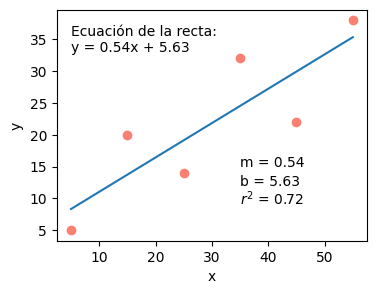

In [14]:
plt.figure(figsize=(4, 3))
plt.scatter(x, y, color="salmon")
plt.plot(x, model.predict(x))
plt.text(5, 33, f"Ecuación de la recta:\ny = {m}x + {b:,.2f}")
plt.text(35, 15, f"m = {m}")
plt.text(35, 12, f"b = {b:,.2f}")
plt.text(35, 9, f"$r^2$ = {r2:,.2f}")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

# Regresión Polinomial

In [15]:
from sklearn.preprocessing import PolynomialFeatures

Función no lineal

$$ f(x) = a\sin(ωx) + \text{ruido} $$

In [16]:
# def f(x, a, ω ):
#   return a * np.sin(ω * x)

f = lambda x, a, ω : a * np.sin(ω * x)

In [17]:
np.random.seed(10)

x = np.linspace(0, 6, 20)
y = f(x, 2.5, 1.3) + 0.3*np.random.randn(len(x))

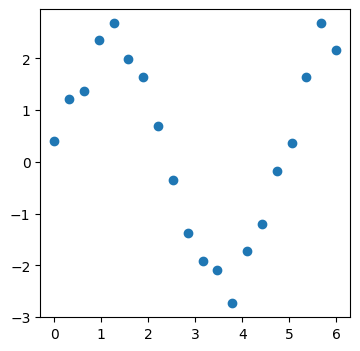

In [18]:
plt.figure(figsize=(4, 4))
plt.scatter(x, y)
plt.show()

Procesamiento de datos

In [19]:
transformador = PolynomialFeatures(degree = 4)
x_transformado = transformador.fit_transform(x.reshape(-1, 1))
x_transformado

array([[1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00],
       [1.00000000e+00, 3.15789474e-01, 9.97229917e-02, 3.14914711e-02,
        9.94467507e-03],
       [1.00000000e+00, 6.31578947e-01, 3.98891967e-01, 2.51931768e-01,
        1.59114801e-01],
       [1.00000000e+00, 9.47368421e-01, 8.97506925e-01, 8.50269719e-01,
        8.05518681e-01],
       [1.00000000e+00, 1.26315789e+00, 1.59556787e+00, 2.01545415e+00,
        2.54583682e+00],
       [1.00000000e+00, 1.57894737e+00, 2.49307479e+00, 3.93643388e+00,
        6.21542192e+00],
       [1.00000000e+00, 1.89473684e+00, 3.59002770e+00, 6.80215775e+00,
        1.28882989e+01],
       [1.00000000e+00, 2.21052632e+00, 4.88642659e+00, 1.08015746e+01,
        2.38771648e+01],
       [1.00000000e+00, 2.52631579e+00, 6.38227147e+00, 1.61236332e+01,
        4.07333891e+01],
       [1.00000000e+00, 2.84210526e+00, 8.07756233e+00, 2.29572824e+01,
        6.52470131e+01],
       [1.00000000e+00, 3.1578

In [20]:
x_transformado.shape

(20, 5)

In [21]:
model = LinearRegression()
model.fit(x_transformado, y)

LinearRegression()

In [22]:
model.predict(x_transformado)

array([-0.29769386,  1.5014038 ,  2.41641184,  2.65298215,  2.39633608,
        1.8112644 ,  1.04212734,  0.21285453, -0.57305492, -1.23253251,
       -1.70294026, -1.94207079, -1.92814725, -1.65982338, -1.15618347,
       -0.45674237,  0.3785545 ,  1.26933115,  2.11478104,  2.79366705])

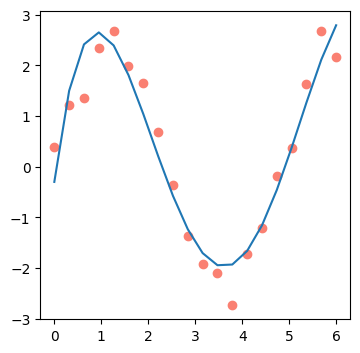

In [23]:
plt.figure(figsize=(4, 4))
plt.scatter(x, y, color = "salmon")
plt.plot(x, model.predict(x_transformado))
plt.show()

In [24]:
model.coef_

array([ 0.        ,  7.33020237, -5.55774314,  1.25059125, -0.08560093])

In [25]:
model.intercept_

-0.2976938580531531

In [26]:
from sklearn.metrics import mean_squared_error

In [27]:
y_pred = model.predict(x_transformado)

In [28]:
mean_squared_error(y, y_pred)

0.20949728210753152

Se define conjuntos train/test

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
x_train, x_test, y_train , y_test = train_test_split(x, y, random_state = 20)

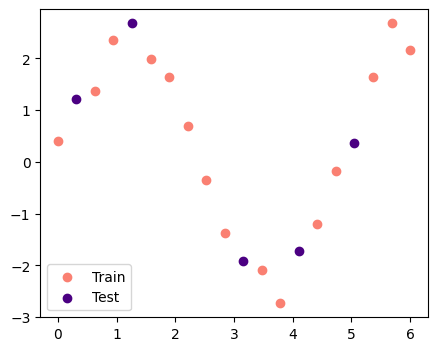

In [31]:
plt.figure(figsize=(5, 4))
plt.scatter(x_train, y_train, color = "salmon", label = "Train")
plt.scatter(x_test, y_test, color = "indigo", label = "Test")

plt.legend()
plt.show()

In [32]:
R = range(1 , 11)
MSE_train = []
MSE_test = []

for n in R:
  transformador = PolynomialFeatures(degree = n)
  x_train_transformado = transformador.fit_transform(x_train.reshape(-1, 1))

  model = LinearRegression()
  model.fit(x_train_transformado, y_train)
  y_train_pred = model.predict(x_train_transformado)
  MSE_train.append(mean_squared_error(y_train, y_train_pred))

  x_test_transformado = transformador.fit_transform(x_test.reshape(-1, 1))
  y_test_pred = model.predict(x_test_transformado)
  MSE_test.append(mean_squared_error(y_test, y_test_pred))



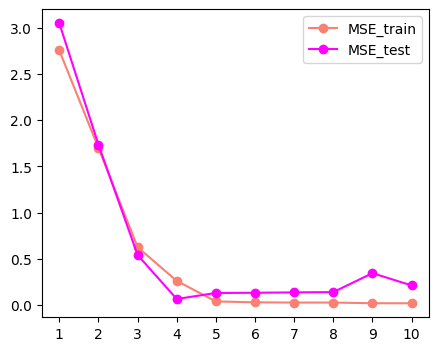

In [33]:
plt.figure(figsize=(5,4))
plt.plot(R, MSE_train, "o-", color = "salmon", label = "MSE_train")
plt.plot(R, MSE_test, "o-", color = "magenta", label = "MSE_test")

plt.legend()
plt.xticks(R)
# plt.grid()
plt.show()

Ejercicio

In [34]:
np.random.seed(10)

x = np.linspace(0, 20, 50)
y = f(x, 2.5, 1.3) + 0.3*np.random.randn(len(x))

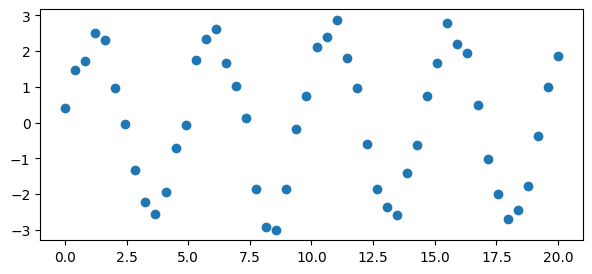

In [35]:
plt.figure(figsize = (7, 3))
plt.scatter(x, y)
plt.show()

In [36]:
x_train = x[:40]
y_train = y[:40]

x_test = x[-10:]
y_test = y[-10:]

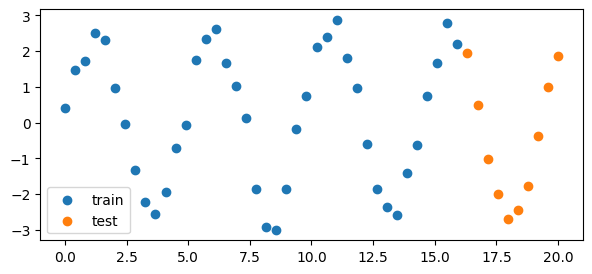

In [37]:
plt.figure(figsize=(7, 3))
plt.scatter(x_train, y_train, label = "train")
plt.scatter(x_test, y_test, label = "test")
plt.legend()
plt.show()

In [38]:
transformador = PolynomialFeatures(degree=5)
x_train_transformado = transformador.fit_transform(x_train.reshape(-1, 1))

In [39]:
x_test_transformado = transformador.fit_transform(x_test.reshape(-1, 1))

In [40]:
model = LinearRegression()
model.fit(x_train_transformado, y_train)
y_train_pred = model.predict(x_train_transformado)
y_test_pred = model.predict(x_test_transformado)
MSE_train.append(mean_squared_error(y_train, y_train_pred))

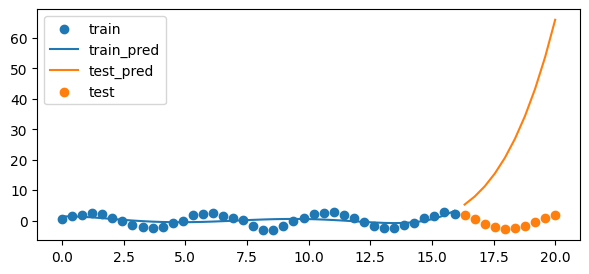

In [41]:
plt.figure(figsize=(7,3))
plt.scatter(x_train, y_train, label="train")
plt.plot(x_train, y_train_pred, label = "train_pred")
plt.plot(x_test, y_test_pred, label = "test_pred")
plt.scatter(x_test, y_test, label = "test")
plt.legend()
plt.show()

------------------------------------------

Regresión con arboles de decisión

In [42]:
from sklearn.tree import DecisionTreeRegressor

In [43]:
np.random.seed(10)

x = np.linspace(0, 6, 20)
y = f(x, 2.5, 1.3) + 0.3*np.random.randn(len(x))

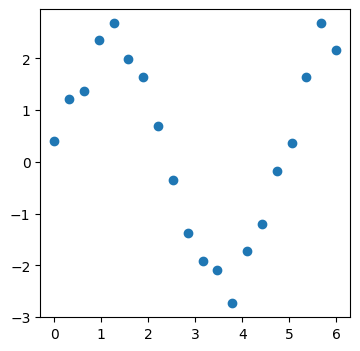

In [44]:
plt.figure(figsize=(4, 4))
plt.scatter(x, y)
plt.show()

In [45]:
x = x.reshape(-1, 1)

In [58]:
arbol = DecisionTreeRegressor(max_depth=5)
arbol.fit(x, y)

DecisionTreeRegressor(max_depth=5)

In [59]:
arbol.predict(x)

array([ 0.39947595,  1.21231361,  1.36603879,  2.51753528,  2.51753528,
        1.8239653 ,  1.8239653 ,  0.69435224, -0.3540498 , -1.96645997,
       -1.96645997, -1.96645997, -1.96645997, -1.96645997, -1.20776999,
       -0.17886629,  0.36247853,  1.64296746,  2.68046636,  2.1724169 ])

In [60]:
x_dom = np.linspace(0, 6, 200).reshape(-1, 1)

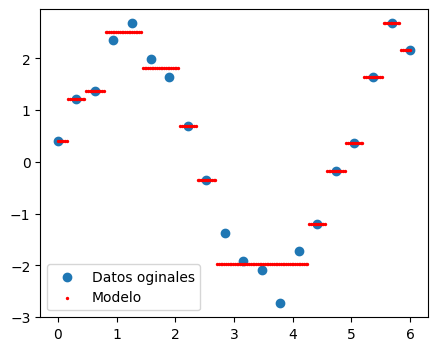

In [61]:
plt.figure(figsize=(5, 4))
plt.scatter(x, y, label="Datos oginales")
plt.scatter(x_dom, arbol.predict(x_dom), color="red", label="Modelo", s=2)
plt.legend()
plt.show()

In [62]:
from sklearn import tree

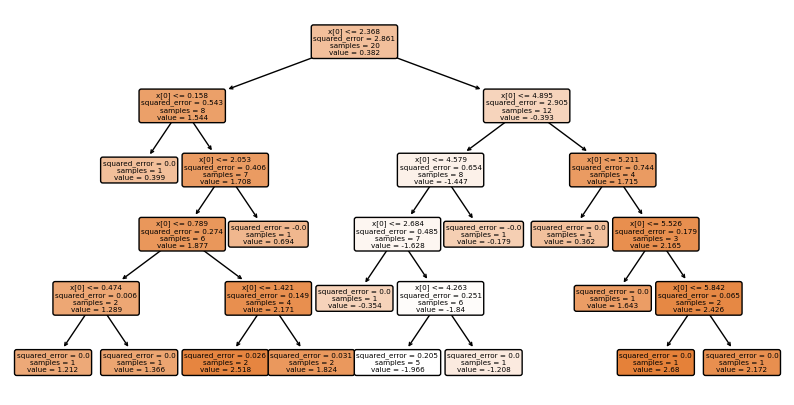

In [63]:
plt.figure(figsize=(10,5))
tree.plot_tree(arbol, filled=True, rounded=True)
plt.show()

Ejemplo 2

In [64]:
x = np.linspace(0, 7, 20).reshape(-1, 1)
y = np.sin(x)

np.random.seed(10)

for n in range(2, len(x), 3):
  y[n] = y[n] + 2*np.random.randn()

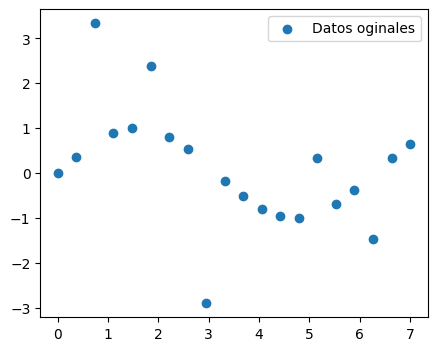

In [65]:
plt.figure(figsize=(5, 4))
plt.scatter(x, y, label="Datos oginales")
plt.legend()
plt.show()

In [68]:
arbol1 = DecisionTreeRegressor(max_depth=2)
arbol1.fit(x, y)

DecisionTreeRegressor(max_depth=2)

In [69]:
arbol2 = DecisionTreeRegressor(max_depth=6)
arbol2.fit(x, y)

DecisionTreeRegressor(max_depth=6)

In [70]:
x_dom = np.linspace(0, 7, 200).reshape(-1, 1)

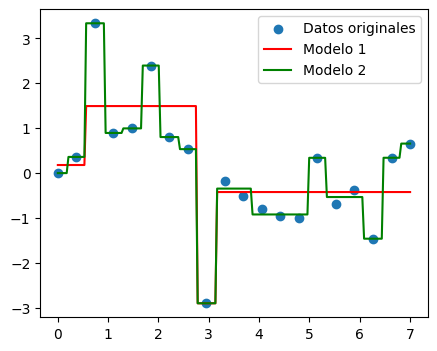

In [72]:
plt.figure(figsize=(5,4))
plt.scatter(x, y, label="Datos originales")
plt.plot(x_dom, arbol1.predict(x_dom), label="Modelo 1", color = "red")
plt.plot(x_dom, arbol2.predict(x_dom), label="Modelo 2", color = "green")
plt.legend()
plt.show()
